In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

--2020-12-21 11:09:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.120.128, 74.125.132.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-12-21 11:09:46 (103 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = Tokenizer()

data = open('/content/sheerandataset.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1;

print(tokenizer.word_index)
print(total_words)


{'i': 1, 'the': 2, 'you': 3, 'and': 4, 'me': 5, 'my': 6, 'in': 7, 'to': 8, 'a': 9, 'love': 10, 'on': 11, 'with': 12, 'that': 13, "i'm": 14, 'your': 15, 'we': 16, 'of': 17, 'know': 18, 'all': 19, 'it': 20, 'but': 21, "don't": 22, 'so': 23, 'be': 24, 'for': 25, 'when': 26, 'she': 27, 'just': 28, 'her': 29, 'this': 30, 'like': 31, 'now': 32, 'baby': 33, 'out': 34, 'are': 35, 'if': 36, 'can': 37, 'is': 38, 'up': 39, 'come': 40, "it's": 41, "i'll": 42, 'need': 43, "you're": 44, 'oh': 45, "'cause": 46, 'then': 47, 'never': 48, 'time': 49, 'was': 50, 'one': 51, 'no': 52, 'not': 53, 'do': 54, 'go': 55, 'wanna': 56, 'yeah': 57, 'down': 58, 'from': 59, "i've": 60, 'got': 61, 'been': 62, 'back': 63, 'take': 64, 'want': 65, 'feel': 66, 'were': 67, 'as': 68, 'home': 69, 'heart': 70, 'eyes': 71, 'could': 72, 'or': 73, "that's": 74, 'cross': 75, 'put': 76, 'have': 77, 'way': 78, 'darling': 79, 'our': 80, 'too': 81, 'by': 82, 'man': 83, 'what': 84, 'let': 85, 'these': 86, 'will': 87, 'hand': 88, 'only

In [ ]:
print(tokenizer.word_index["ain't"])

98


In [ ]:
input_seq = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    ngram_seq = token_list[:i+1]
    input_seq.append(ngram_seq)

max_seq_len = max([len(x) for x in input_seq])
input_seq = np.array(pad_sequences(input_seq,maxlen = max_seq_len,padding = 'pre'))

xs,labels = input_seq[:,:-1],input_seq[:,-1]

ys = tf.keras.utils.to_categorical(labels,num_classes = total_words)


In [ ]:
print(max_seq_len)

16


In [ ]:
model = Sequential()
model.add(Embedding(total_words,90,input_length = max_seq_len - 1))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(70)))
#model.add(Bidirectional(LSTM(30)))
#model.add(Dense(512,activation = 'relu'))
#model.add(Dense(10,activation = 'relu'))
model.add(Dense(total_words,activation = 'softmax'))
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 90)            136620    
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 160)           109440    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 140)               129360    
_________________________________________________________________
dense (Dense)                (None, 1518)              214038    
Total params: 589,458
Trainable params: 589,458
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(xs, ys, epochs=50, verbose=1)

Epoch 1/50
297/297 [==============================] - 14s 11ms/step - loss: 6.2861 - accuracy: 0.0381
Epoch 2/50
297/297 [==============================] - 4s 12ms/step - loss: 5.5133 - accuracy: 0.0615
Epoch 3/50
297/297 [==============================] - 3s 12ms/step - loss: 5.0422 - accuracy: 0.1144
Epoch 4/50
297/297 [==============================] - 3s 11ms/step - loss: 4.7367 - accuracy: 0.1477
Epoch 5/50
297/297 [==============================] - 3s 11ms/step - loss: 4.5466 - accuracy: 0.1713
Epoch 6/50
297/297 [==============================] - 3s 11ms/step - loss: 4.0939 - accuracy: 0.2216
Epoch 7/50
297/297 [==============================] - 3s 11ms/step - loss: 3.9098 - accuracy: 0.2436
Epoch 8/50
297/297 [==============================] - 3s 11ms/step - loss: 3.6106 - accuracy: 0.2786
Epoch 9/50
297/297 [==============================] - 3s 11ms/step - loss: 3.3180 - accuracy: 0.3147
Epoch 10/50
297/297 [==============================] - 3s 12ms/step - loss: 3.0672 - accur

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

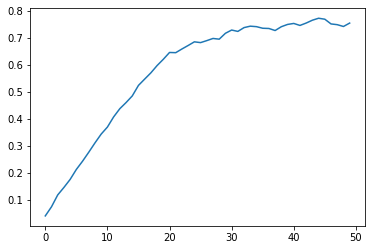

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

In [ ]:
seed_text = "i hear a song"
next_words = 150
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


i hear a song that i just want to better 'cause i know a bit wrong a bit or sell a bit you're a gimmick a bit a gimmick a gimmick image a gimmick the image a bit a bit a bit a bit a gimmick a bit a image a bit a bit a bit the a bit a gimmick a bit a bit a bit a bit and sell a gimmick a bit a gimmick a bit a gimmick a image image a gimmick a bit a bit a gimmick image a bit a image fly to the a bit a image a bit a bit a bit a bit a bit a gimmick a bit a bit a bit a bit a bit a gimmick a bit a bit a bit a bit a bit a gimmick a bit a bit a bit a bit a bit a gimmick a bit


In [ ]:
model.save("sheeran_npl_model.h5")

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# New section

In [ ]:
import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
model = keras.models.load_model('sheeran_npl_model.h5')

In [ ]:
seed_text = "i hear a song"
next_words = 150
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=16-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


i hear a song and come good to to the ill woman come again hopeless as your pocket my as so it me li to and alone quite go pocket pocket fond and alone or black me bright it a it as my very but a serve moon and moonlight as take their me pocket me flag me sat the story and far quite on story that through die and far ground i it me crooning today it a in and hearts it and quite from it and quite the play and flag all and just with and quite it a my a me run the may stood alone put a and home my me fond alone morning it me until quite it me town stood it me through to pocket or me alone pheasants a it me fountain all of till me through it a it hosannahs their a their will as me
